<a href="https://colab.research.google.com/github/ars7/Time-Series-Project/blob/main/Replication_Data_Processing_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HUL 715 Paper Replication**
***A dynamic multiple equation approach for forecasting PM pollution in Santiago, Chile Stella Moisana, Rodrigo Herrera and Adam Clements.***




> **ABSTRACT**


This paper proposes a methodology based on a system of dynamic multiple linear equations that incorporates hourly, daily and annual seasonal characteristics for predicting hourly PM-2.5 pollution concentrations for 11 meteorological stations in Santiago, Chile. 


> **ENVIRONMENT SETUP**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


> **DATA DESCRIPTION AND INTERPRETATION**




The data were collected from the National Air Quality Information System (SINCA) for the period 1 January 2011 to 31 August 2015. The observation stations are :

*   Cerrillos
*   Cerro Navia
*   El Bosque
*   Independencia
*   La Condes
*   La Florida
*   Parque O'Higgins
*   Pudahuel
*   Puente Alto
*   Quilicura
*   Talagante


In [ ]:
cerrillosM = pd.read_csv("cerrillosM.csv")
cerronaviaM = pd.read_csv("cerronaviaM.csv")
condesM = pd.read_csv("condesM.csv")
elbosqueM = pd.read_csv("elbosqueM.csv")
independenciaM = pd.read_csv("independenciaM.csv")
lafloridaM = pd.read_csv("lafloridaM.csv")
parqueM = pd.read_csv("parqueM.csv")
pudahuelM = pd.read_csv("pudahuelM.csv")
puentealtoM = pd.read_csv("puentealtoM.csv")
quilicuraM = pd.read_csv("quilicuraM.csv")
talaganteM = pd.read_csv("talaganteM.csv")

Hourly, weekly, monthly trends in 11 stations.

In [ ]:
def days(data):
  return [(5+i)%7 for i in range(len(data))]

def months(data):
  month = []
  for i in range(len(data)):
    month.append(int((data["FECHA"][i].split("-"))[1]))
  return month

def violingraphs(data):
  data["DAYS"] = days(data)
  data["MONTH"] = months(data)
  plt.figure(figsize=(16, 6))
  ax = sns.violinplot(x="HORA", y="PM25", data=data)

  plt.figure(figsize=(16, 6))
  ax = sns.violinplot(x="DAYS", y="PM25", data=data)

  plt.figure(figsize=(16, 6))
  ax = sns.violinplot(x="MONTH", y="PM25", data=data)


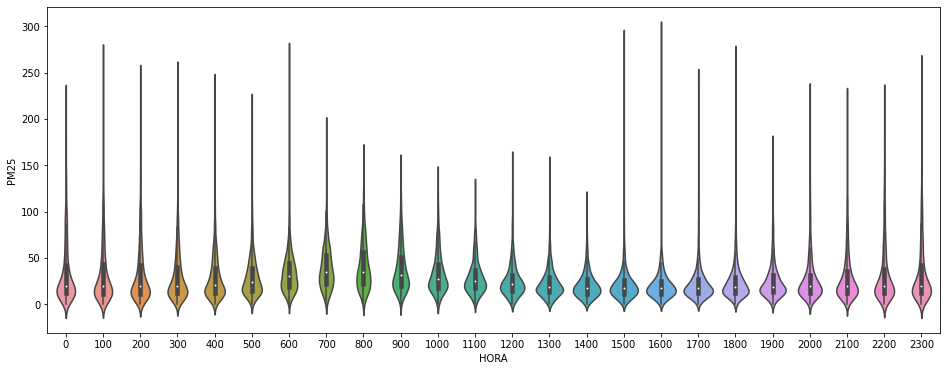

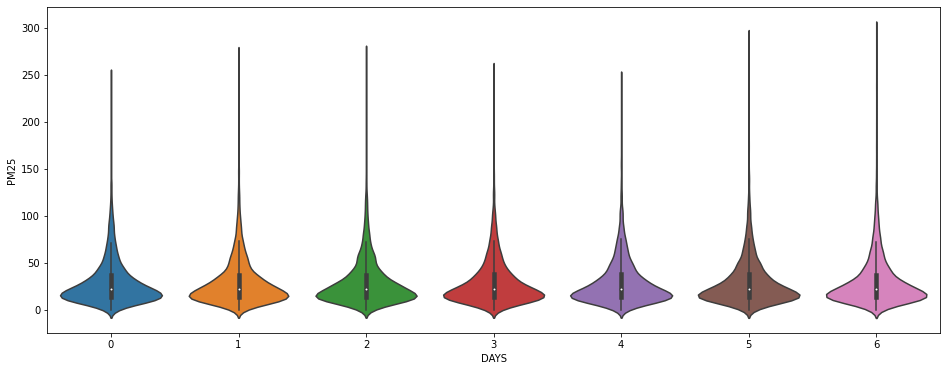

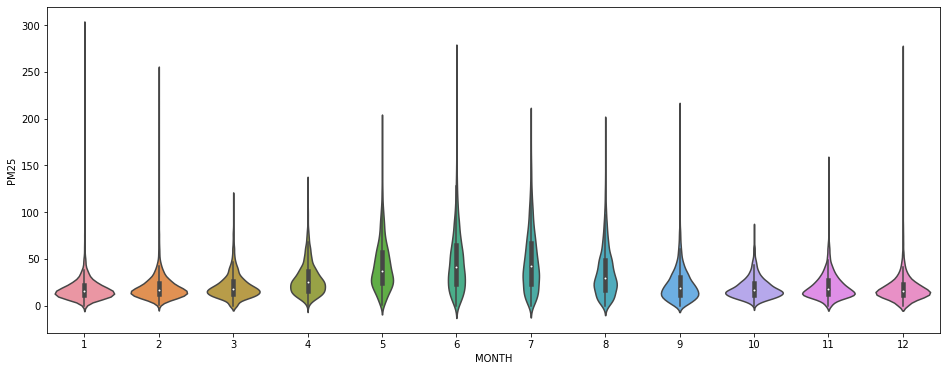

In [ ]:
# cerrillosM
violingraphs(cerrillosM)

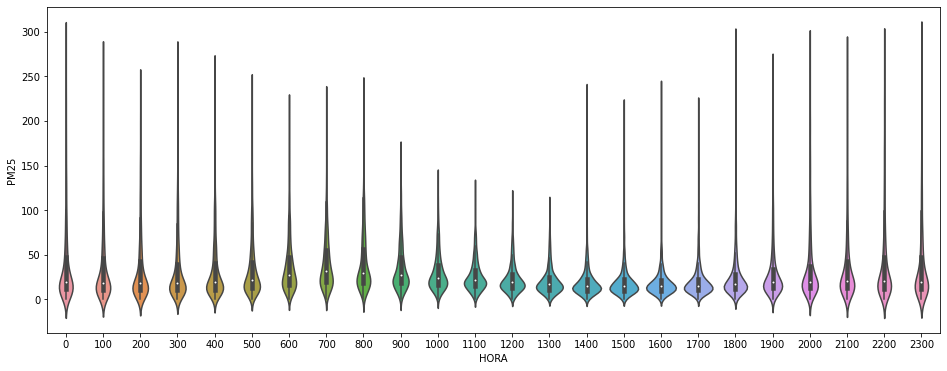

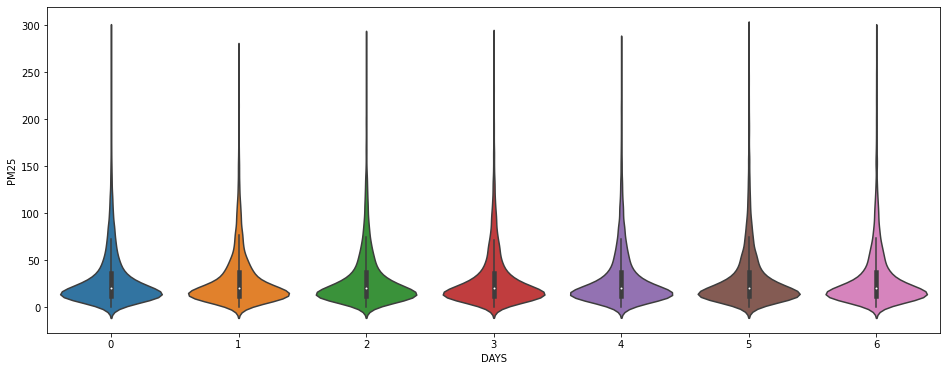

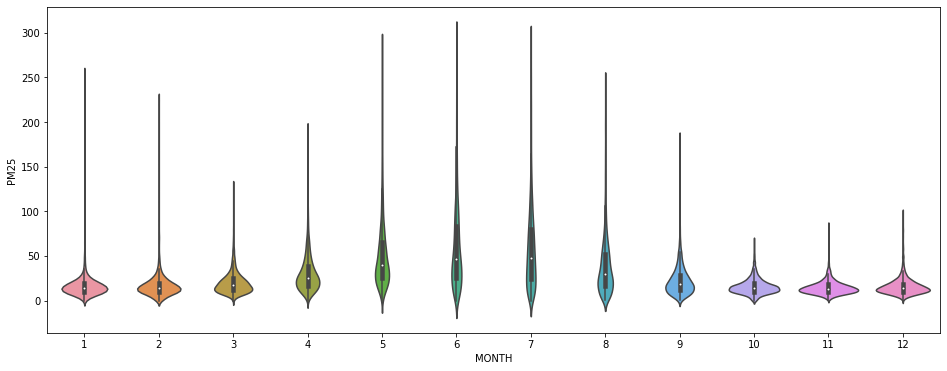

In [ ]:
# cerronaviaM
violingraphs(cerronaviaM)

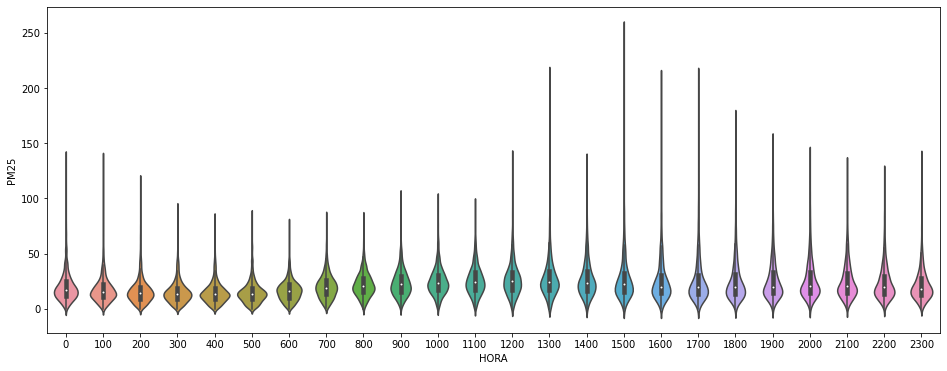

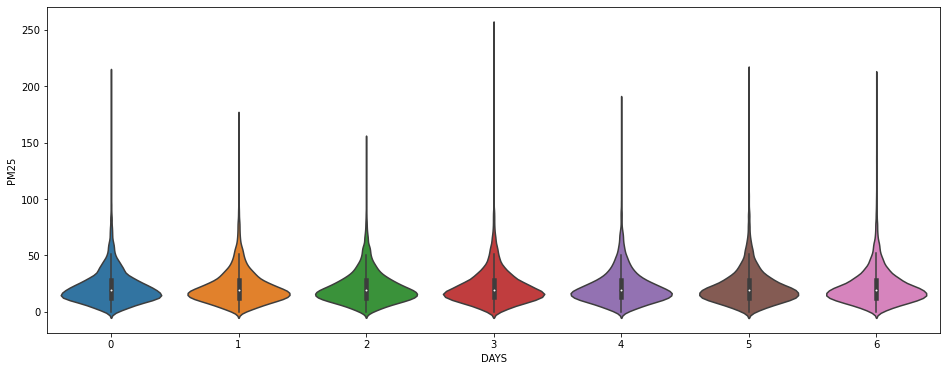

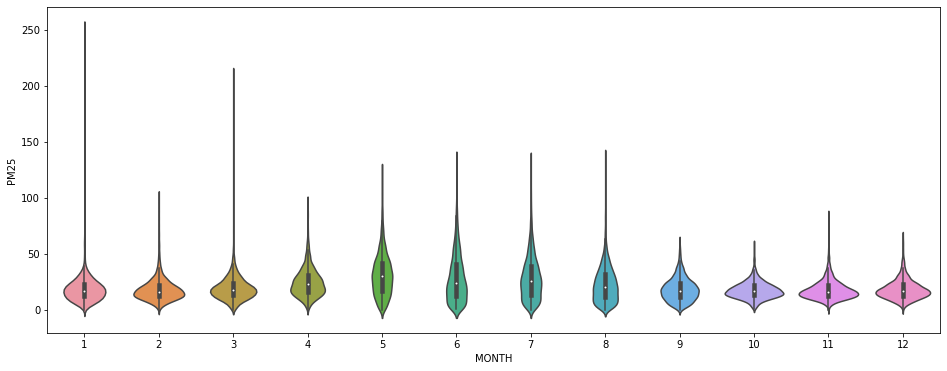

In [ ]:
# condesM
violingraphs(condesM)

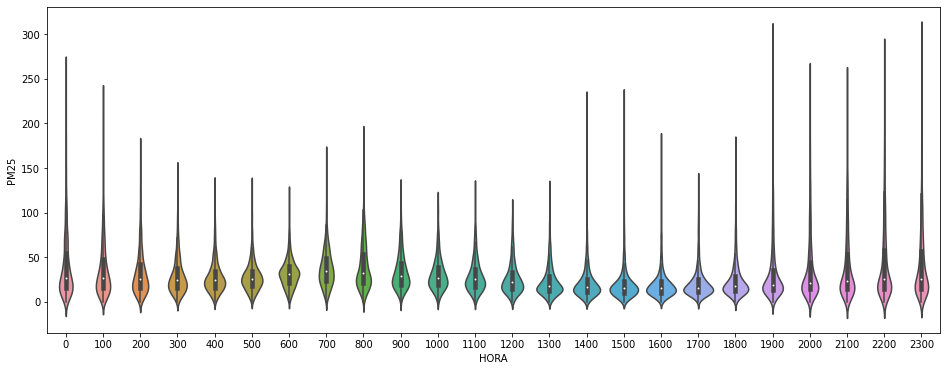

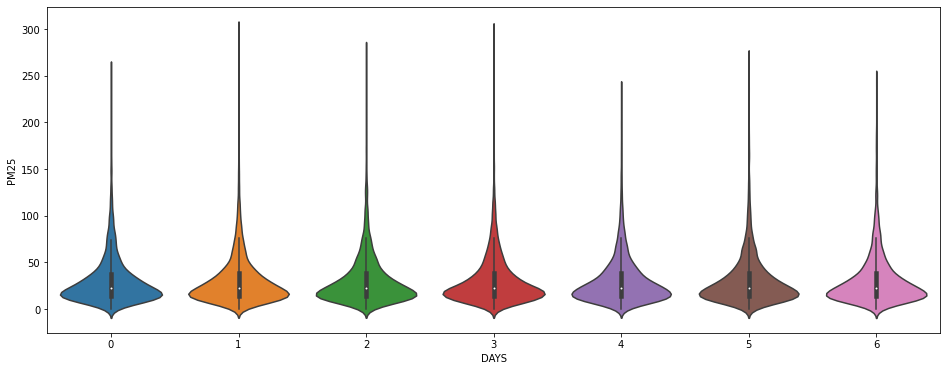

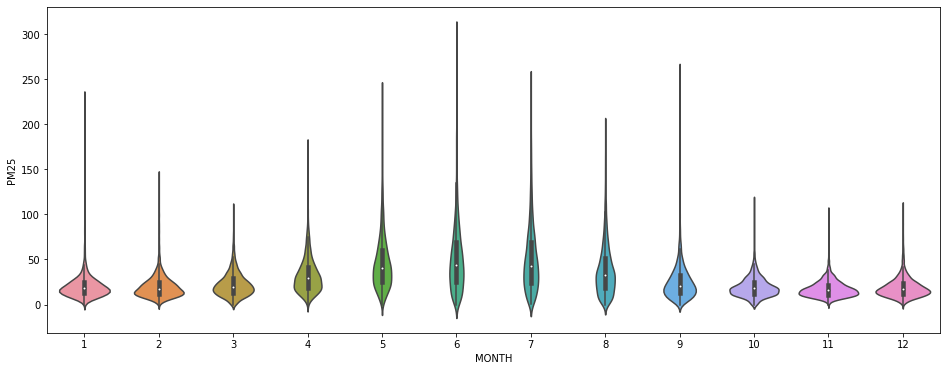

In [ ]:
# elbosqueM
violingraphs(elbosqueM)

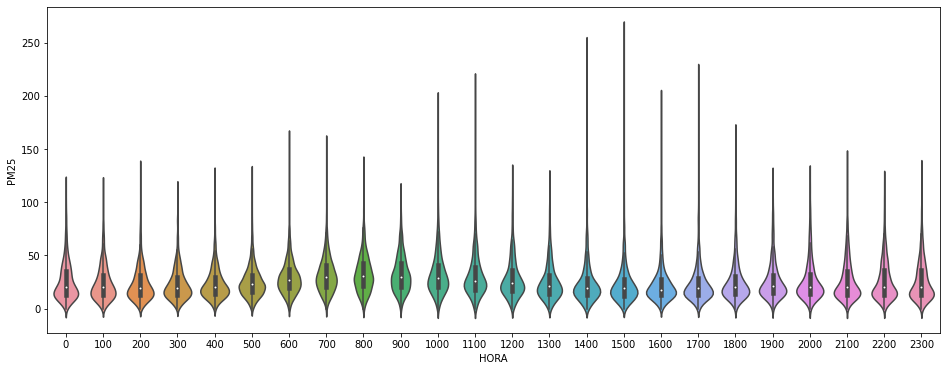

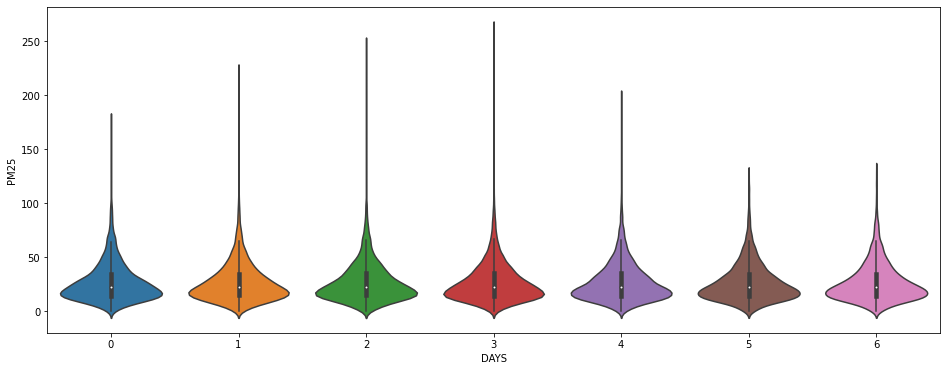

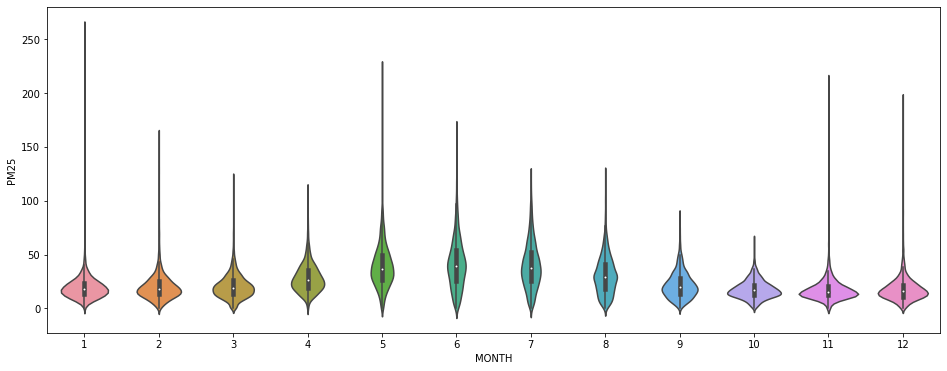

In [ ]:
# independenciaM
violingraphs(independenciaM)

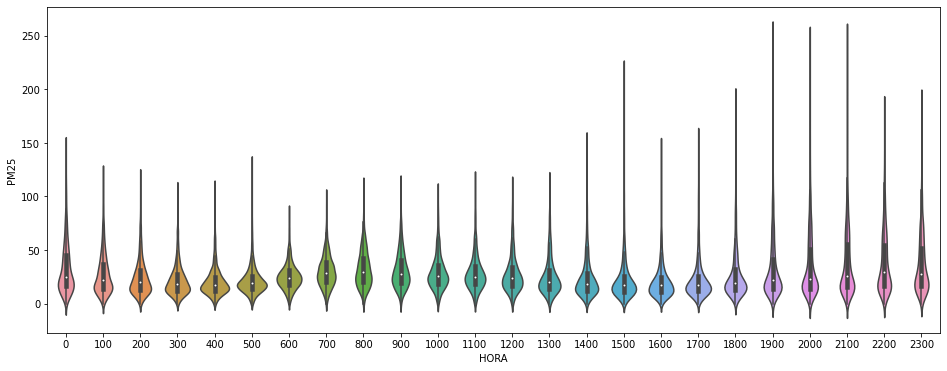

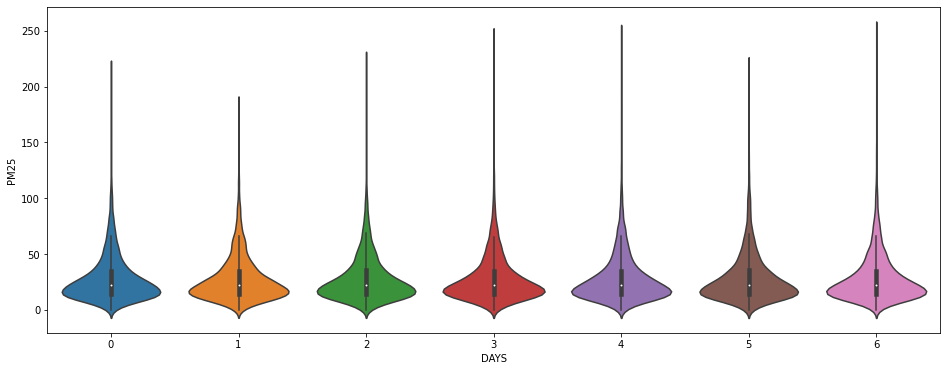

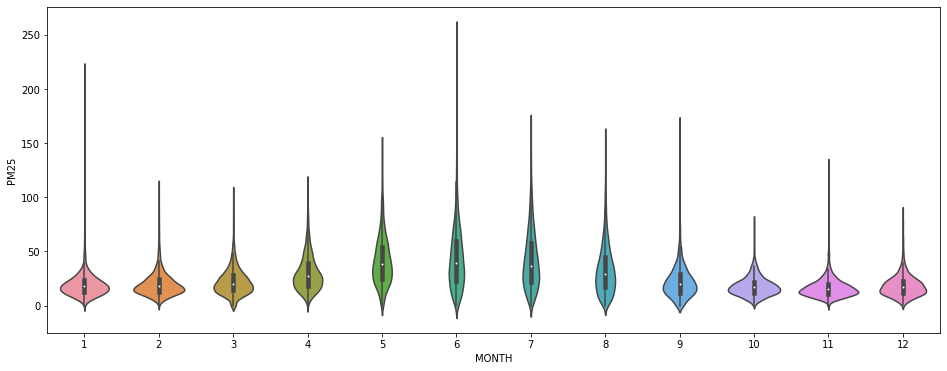

In [ ]:
# lafloridaM
violingraphs(lafloridaM)

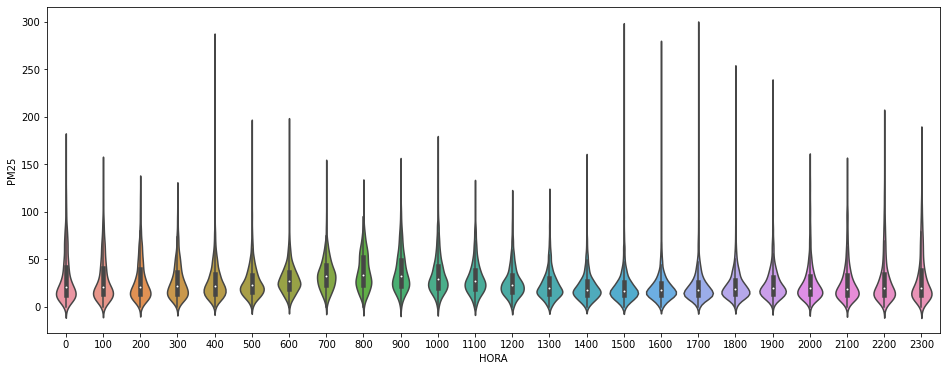

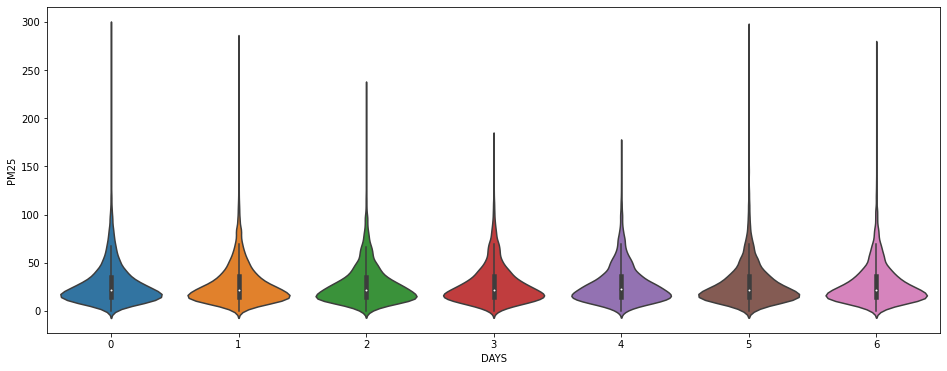

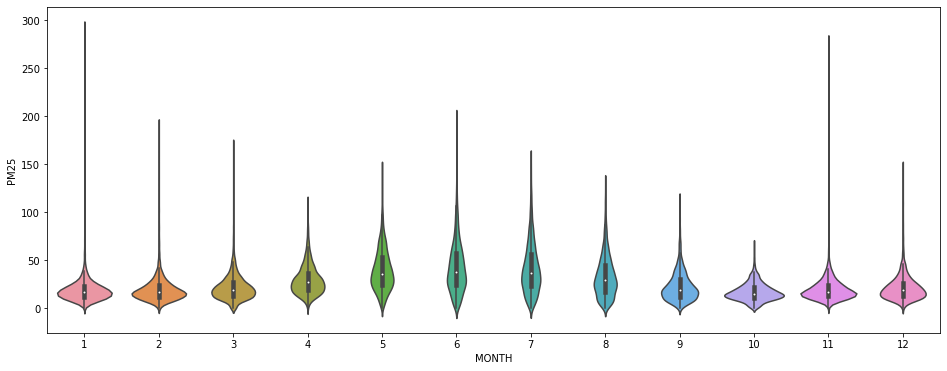

In [ ]:
# parqueM
violingraphs(parqueM)

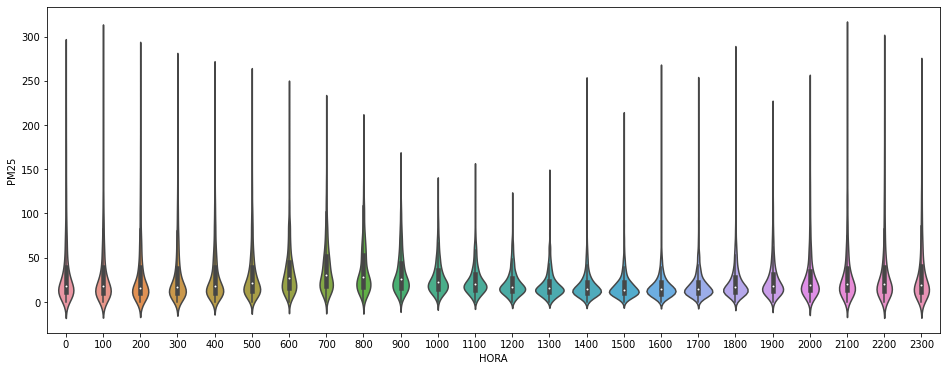

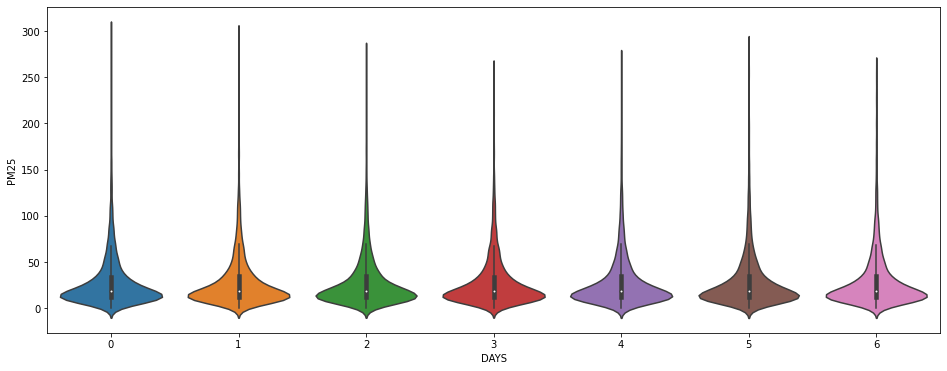

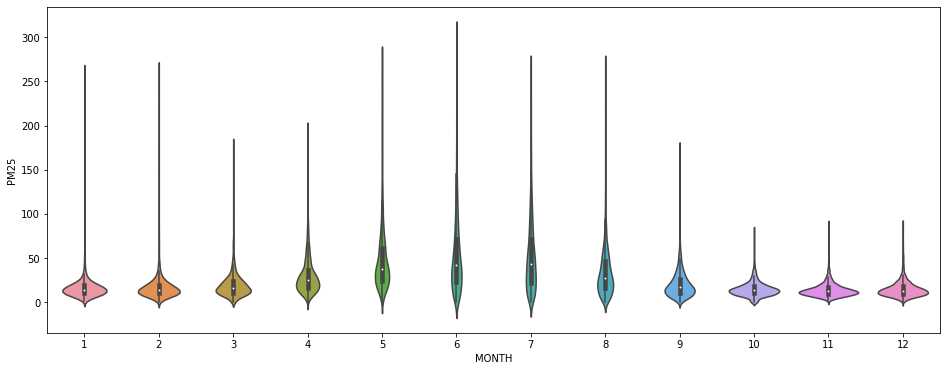

In [ ]:
# pudahuelM
violingraphs(pudahuelM)

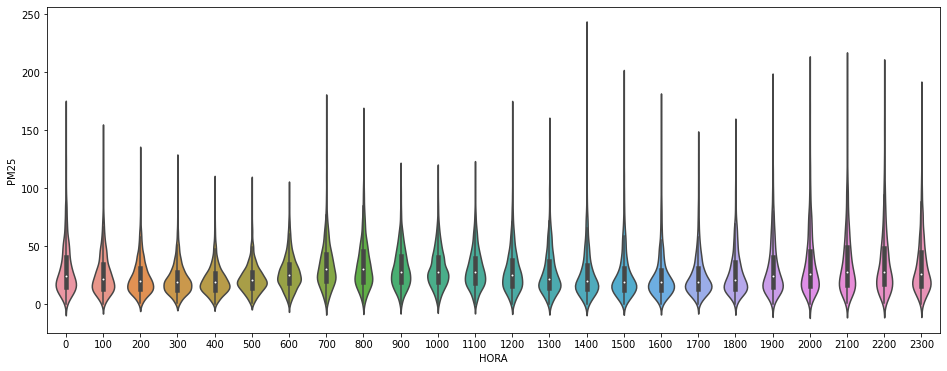

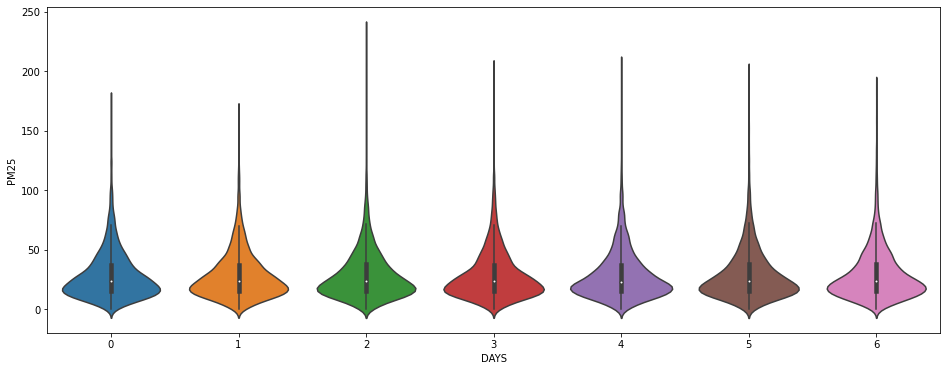

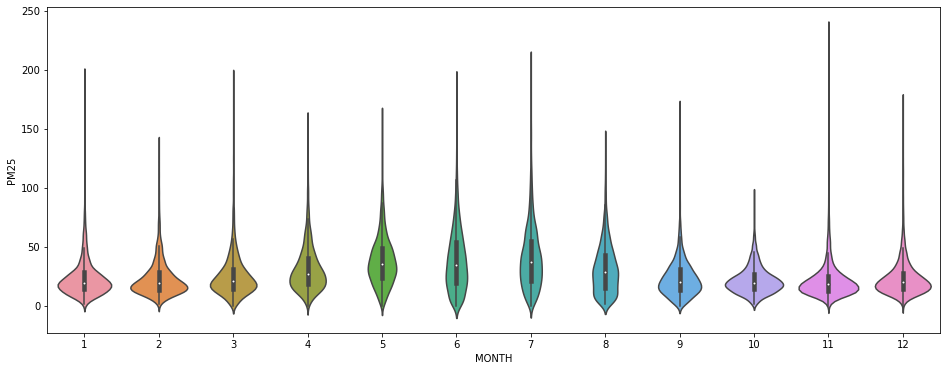

In [ ]:
# puentealtoM
violingraphs(puentealtoM)

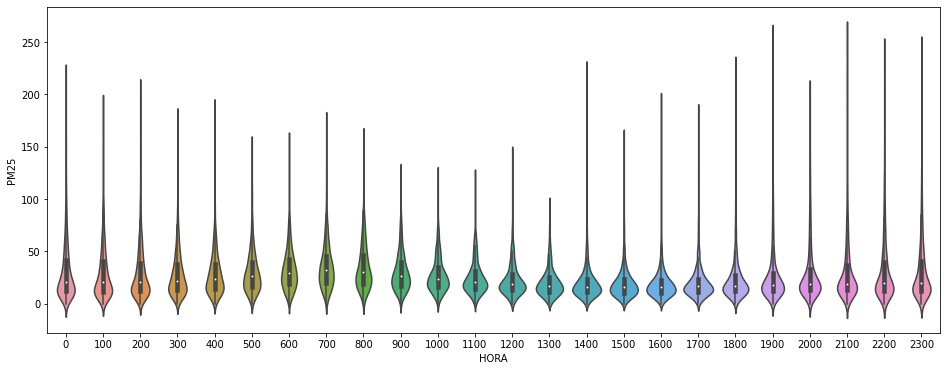

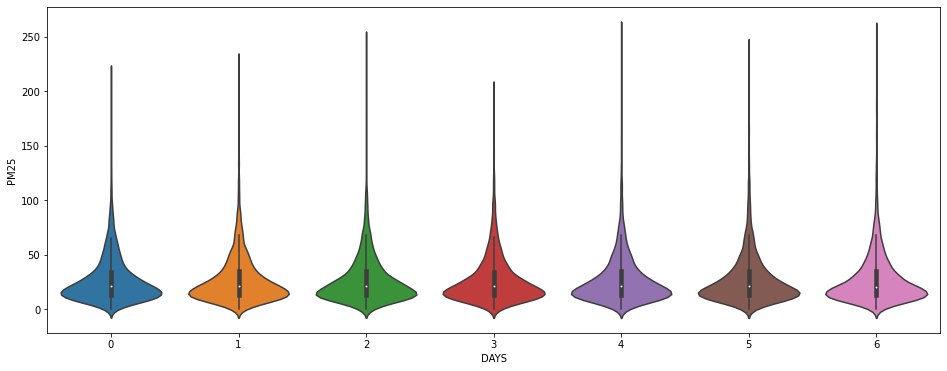

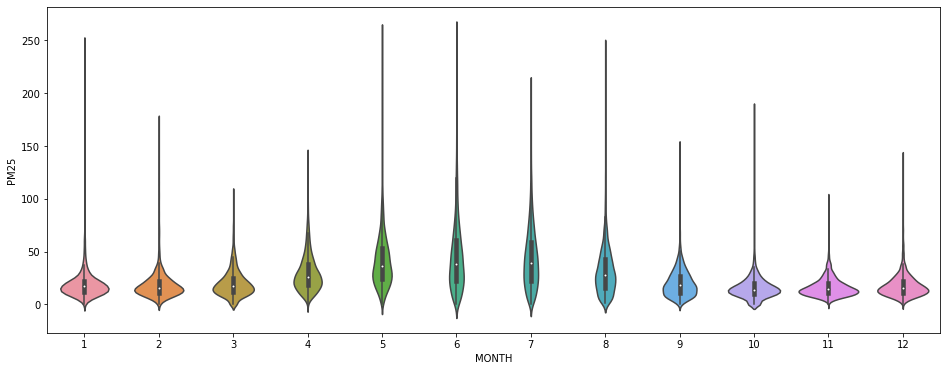

In [ ]:
# quilicuraM
violingraphs(quilicuraM)

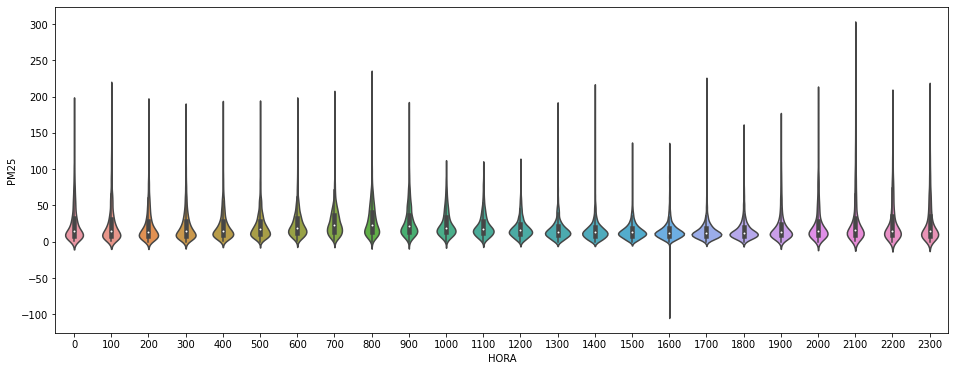

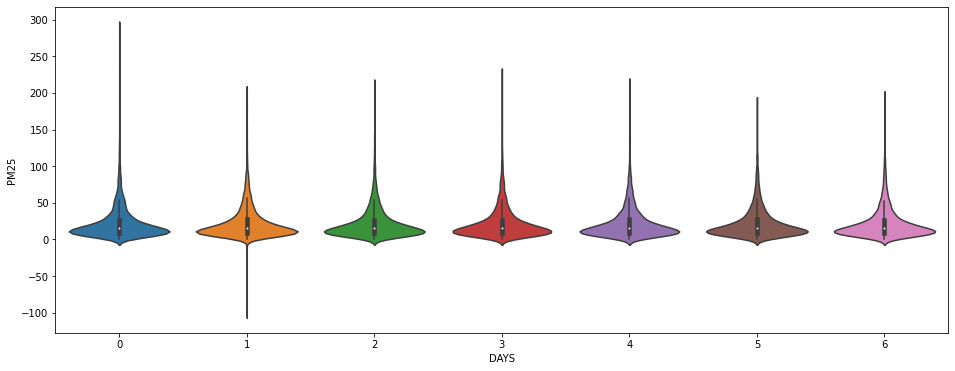

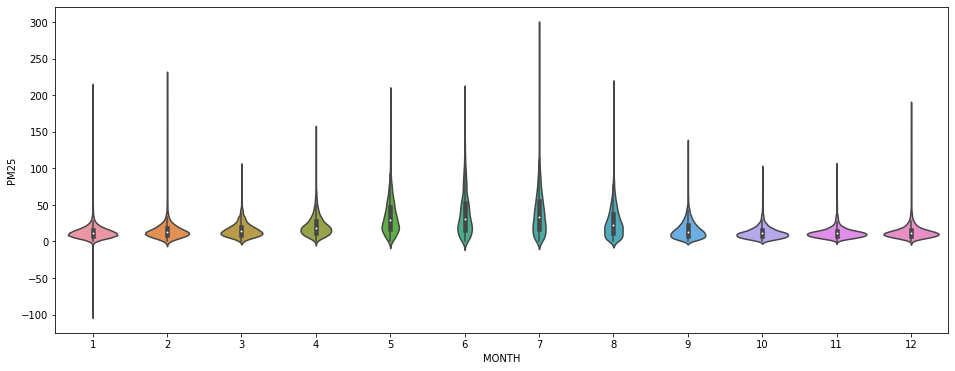

In [ ]:
# talaganteM
violingraphs(talaganteM)

Hourly time series of  concentration,  concentration [ppb], temperature [C], relative humidity [%], wind direction and wind speed [m/s] for the Pudahuel monitoring station from January 2011 to August 2015.

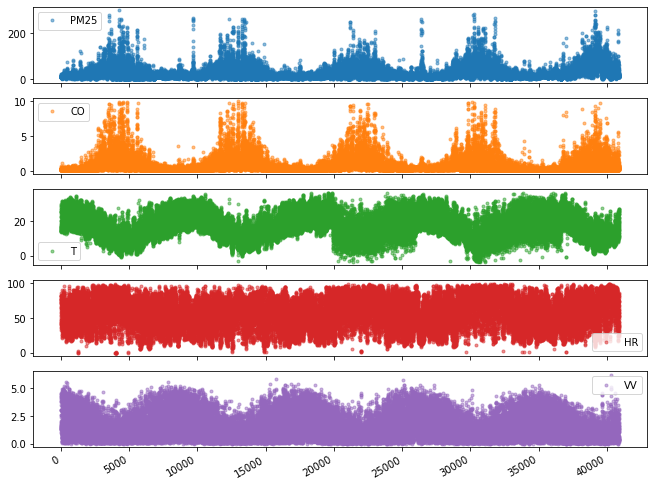

In [ ]:
cols_plot = ['PM25', 'CO', 'T','HR','VV']
axes = pudahuelM[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)



> **PREPROCESSING DATA FOR REPLICATION**


In [ ]:
RM = pd.read_csv("PM.csv",header=0,sep=",")
pesos = pd.read_csv("pesosdist.csv",header=0,sep=",")

In [ ]:
w = pd.DataFrame(data=pesos["CERRILLOS"])

In [ ]:
print(type(w))
w

<class 'pandas.core.frame.DataFrame'>


,CERRILLOS
0,0.00000
1,0.07167
2,0.09659
3,0.05172
4,0.04994
5,0.08112
6,0.07669
7,0.04719
8,0.04918
9,0.07757


In [ ]:
print((RM).shape)
RM

(40896, 13)


,FECHA,HORA,CERRILLOS,INDEPENDENCIA,CONDES,ELBOSQUE,PARQUE,TALAGANTE,QUILICURA,PUDAHUEL,CERRONAVIA,LAFLORIDA,PUENTEALTO
0,01-01-2011,100,9.0,19.0,26.0,15.0,10.0,7.0,31.0,17.0,15.0,46.0,82.0
1,01-01-2011,200,7.0,14.0,19.0,17.0,9.0,6.0,18.0,15.0,15.0,32.0,68.0
2,01-01-2011,300,7.0,13.0,17.0,16.0,7.0,6.0,17.0,11.0,12.0,19.0,42.0
3,01-01-2011,400,8.0,18.0,17.0,23.0,9.0,10.0,10.0,11.0,10.0,25.0,29.0
4,01-01-2011,500,10.0,24.0,19.0,15.0,12.0,12.0,13.0,9.0,9.0,12.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40891,31-08-2015,2000,18.0,18.0,18.0,38.0,15.0,11.7,19.0,14.0,18.0,24.0,17.0
40892,31-08-2015,2100,24.0,28.0,16.0,36.0,16.0,10.4,19.0,15.0,16.0,34.0,23.0
40893,31-08-2015,2200,22.0,25.0,18.0,26.0,25.0,14.5,13.0,14.0,19.0,27.0,18.0
40894,31-08-2015,2300,22.0,23.0,14.0,26.0,33.0,23.1,20.0,23.0,21.0,20.0,20.0


In [ ]:
RM1 = RM.iloc[:, 2:13]
RM1

,CERRILLOS,INDEPENDENCIA,CONDES,ELBOSQUE,PARQUE,TALAGANTE,QUILICURA,PUDAHUEL,CERRONAVIA,LAFLORIDA,PUENTEALTO
0,9.0,19.0,26.0,15.0,10.0,7.0,31.0,17.0,15.0,46.0,82.0
1,7.0,14.0,19.0,17.0,9.0,6.0,18.0,15.0,15.0,32.0,68.0
2,7.0,13.0,17.0,16.0,7.0,6.0,17.0,11.0,12.0,19.0,42.0
3,8.0,18.0,17.0,23.0,9.0,10.0,10.0,11.0,10.0,25.0,29.0
4,10.0,24.0,19.0,15.0,12.0,12.0,13.0,9.0,9.0,12.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...
40891,18.0,18.0,18.0,38.0,15.0,11.7,19.0,14.0,18.0,24.0,17.0
40892,24.0,28.0,16.0,36.0,16.0,10.4,19.0,15.0,16.0,34.0,23.0
40893,22.0,25.0,18.0,26.0,25.0,14.5,13.0,14.0,19.0,27.0,18.0
40894,22.0,23.0,14.0,26.0,33.0,23.1,20.0,23.0,21.0,20.0,20.0


In [ ]:
wT = (w.T).to_numpy()
RMT = (RM1.T).to_numpy()

In [ ]:
prod = np.dot(wT,RMT)

In [ ]:
print(prod.shape)

(1, 40896)


In [ ]:
RM = RM.iloc[8761:32131,:]

In [ ]:
RM

,FECHA,HORA,CERRILLOS,INDEPENDENCIA,CONDES,ELBOSQUE,PARQUE,TALAGANTE,QUILICURA,PUDAHUEL,CERRONAVIA,LAFLORIDA,PUENTEALTO
8761,01-01-2012,200,20.5,21.0,40.5,19.0,26.5,19.0,22.0,22.5,20.0,28.0,21.5
8762,01-01-2012,300,22.0,25.5,33.5,20.5,19.5,19.5,25.0,25.0,22.5,24.0,17.5
8763,01-01-2012,400,22.5,22.0,29.5,19.0,24.5,20.0,25.0,24.5,23.0,26.5,24.5
8764,01-01-2012,500,21.0,24.0,32.0,21.0,21.0,22.5,24.5,25.5,23.0,24.5,26.5
8765,01-01-2012,600,28.5,25.5,34.5,28.0,21.5,23.5,26.5,26.5,23.5,28.5,43.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32126,31-08-2014,1500,7.0,19.0,20.0,21.0,9.0,6.0,15.0,22.0,15.0,28.0,13.0
32127,31-08-2014,1600,13.0,15.0,28.0,23.0,15.0,1.0,19.0,22.0,20.0,21.0,16.0
32128,31-08-2014,1700,6.0,21.0,20.0,16.0,14.0,6.0,20.0,16.0,20.0,24.0,14.0
32129,31-08-2014,1800,5.0,19.0,17.0,20.0,18.0,8.0,20.0,17.0,17.0,26.0,11.0


In [ ]:
data = pd.read_csv("cerrillosM.csv",header=0,sep=",")
data

,Unnamed: 0,FECHA,HORA,PM25,CO,T,HR,DV,VV
0,22801,01-01-2011,100,9.0,0.5000,16.18,77.67,214.90,1.9890
1,22802,01-01-2011,200,7.0,0.4000,15.31,81.17,214.30,2.0770
2,22803,01-01-2011,300,7.0,0.3000,14.63,84.00,214.70,2.5780
3,22804,01-01-2011,400,8.0,0.3000,13.88,87.75,220.90,2.5300
4,22805,01-01-2011,500,10.0,0.3000,13.37,90.58,214.80,1.9180
...,...,...,...,...,...,...,...,...,...
40891,63692,31-08-2015,2000,18.0,1.0520,21.25,42.25,233.70,0.9594
40892,63693,31-08-2015,2100,24.0,1.3800,19.89,47.83,186.40,1.0410
40893,63694,31-08-2015,2200,22.0,0.6313,18.63,55.75,77.51,0.5911
40894,63695,31-08-2015,2300,22.0,0.6650,17.47,63.00,133.40,1.3460


In [ ]:
data = data.iloc[:,1:]

In [ ]:
data

,FECHA,HORA,PM25,CO,T,HR,DV,VV
0,01-01-2011,100,9.0,0.5000,16.18,77.67,214.90,1.9890
1,01-01-2011,200,7.0,0.4000,15.31,81.17,214.30,2.0770
2,01-01-2011,300,7.0,0.3000,14.63,84.00,214.70,2.5780
3,01-01-2011,400,8.0,0.3000,13.88,87.75,220.90,2.5300
4,01-01-2011,500,10.0,0.3000,13.37,90.58,214.80,1.9180
...,...,...,...,...,...,...,...,...
40891,31-08-2015,2000,18.0,1.0520,21.25,42.25,233.70,0.9594
40892,31-08-2015,2100,24.0,1.3800,19.89,47.83,186.40,1.0410
40893,31-08-2015,2200,22.0,0.6313,18.63,55.75,77.51,0.5911
40894,31-08-2015,2300,22.0,0.6650,17.47,63.00,133.40,1.3460


In [ ]:
n = 23370-168 

In [ ]:
k1 = 1
k2 = 153*(24/k1)
k3 = 1

In [ ]:
position = data["FECHA"]

In [ ]:
PM = RM.iloc[(169-k3):(n+168-k3)+1,:]

In [ ]:
PM

,FECHA,HORA,CERRILLOS,INDEPENDENCIA,CONDES,ELBOSQUE,PARQUE,TALAGANTE,QUILICURA,PUDAHUEL,CERRONAVIA,LAFLORIDA,PUENTEALTO
8929,08-01-2012,200,8.0,8.5,5.0,10.0,8.5,7.5,11.0,7.0,9.0,9.5,14.0
8930,08-01-2012,300,9.5,9.5,6.0,12.5,8.5,7.5,10.0,10.5,11.0,12.5,14.0
8931,08-01-2012,400,9.5,11.5,7.5,25.5,13.0,15.5,10.0,10.0,10.5,13.5,17.5
8932,08-01-2012,500,16.5,11.0,6.5,25.0,9.5,13.5,9.0,12.0,11.5,16.0,19.0
8933,08-01-2012,600,30.0,16.5,10.0,24.0,17.5,20.0,11.5,17.0,16.0,21.0,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32126,31-08-2014,1500,7.0,19.0,20.0,21.0,9.0,6.0,15.0,22.0,15.0,28.0,13.0
32127,31-08-2014,1600,13.0,15.0,28.0,23.0,15.0,1.0,19.0,22.0,20.0,21.0,16.0
32128,31-08-2014,1700,6.0,21.0,20.0,16.0,14.0,6.0,20.0,16.0,20.0,24.0,14.0
32129,31-08-2014,1800,5.0,19.0,17.0,20.0,18.0,8.0,20.0,17.0,17.0,26.0,11.0


In [ ]:
Temp = (data.iloc[(169-k3):(n+168-k3)+1,:])["T"]
Hum = data.iloc[(169-k3):(n+168-k3)+1,:]["HR"]
VV = data.iloc[(169-k3):(n+168-k3)+1,:]["VV"]
CO = data.iloc[(169-k3):(n+168-k3)+1,:]["CO"]
DV = data.iloc[(169-k3):(n+168-k3)+1,:]["DV"]

In [ ]:
DV = DV-315

In [ ]:
# {1,2,3,4 -> ['N','E','S','W']}
DV = pd.cut(DV,bins=(-315,-225,-135,-45,45), labels=[1,2,3,4])

In [ ]:
DV

168      3
169      3
170      3
171      3
172      3
        ..
23365    3
23366    3
23367    3
23368    3
23369    3
Name: DV, Length: 23202, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
data = data["PM25"]

In [ ]:
# conversion = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
weekdays = days(position)[145:(n+144)+1]

In [ ]:
len(weekdays)

23202

In [ ]:
PMhd = data.iloc[169:n+169]
PMh1d = data.iloc[168:(n+167)+1]
PMhd1 = data.iloc[145:(n+144)+1]
PMhd7 = data.iloc[1:n+1]

In [ ]:
PMhd7

1         7.0
2         7.0
3         8.0
4        10.0
5        12.0
         ... 
23198    22.0
23199    16.0
23200    17.0
23201    22.0
23202    25.0
Name: PM25, Length: 23202, dtype: float64

In [ ]:
hour = [int(element/100) for element in PM["HORA"]]

In [ ]:
PMhd1=PMhd1*weekdays

In [ ]:
DV = DV.astype(int)
VV = VV.multiply(DV)

In [ ]:
VV

168       5.8860
169       5.6100
170       5.0580
171       4.2240
172       2.8803
          ...   
23365     2.5935
23366    12.5220
23367    12.8010
23368    11.1000
23369     7.9650
Length: 23202, dtype: float64

In [ ]:
final_data = pd.concat([PMhd,PMhd1,PMhd7,PMh1d,CO,Temp,Hum,VV,PM,pd.Series(hour)],axis=1)

In [ ]:
final_data.to_csv("final_data.csv")



End of Data Processing for the models.
